In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(10, 10))
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Read preprocessed data

In [4]:
df = pd.read_csv("../data/loki_descriptors_subsample_194.csv")

In [5]:
df.shape

(1940, 33)

In [6]:
df.describe()

,Unnamed: 0,object_fourier_descriptor_09,object_hu_moment_1,object_hu_moment_3,object_fourier_descriptor_05,object_kurtosis,object_structure,object_area,object_fourier_descriptor_06,object_hu_moment_4,...,object_width,object_lenght,object_convexity,object_form,object_fourier_descriptor_10,object_index,object_dr._haardt_fluorescence_channel_a,object_conductivity,object_fourier_descriptor_08,object_hu_moment_2
count,1940.000000,1940.000000,1940.000000,1.940000e+03,1940.000000,1940.000000,1.940000e+03,1940.000000,1940.000000,1.940000e+03,...,1940.0,1940.0,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.00000,1940.000000,1.940000e+03
mean,22438.000000,4026.418850,0.310004,1.926070e-02,11789.739548,4.591158,8.688631e+04,2.536235,8826.753005,1.173953e-02,...,0.0,0.0,47.053585,6.920722,3612.659606,22957.417526,3.315093,30.54997,5035.542438,8.185441e-02
std,13419.348536,14363.791905,0.193180,9.515422e-02,42133.474538,5.522030,2.415336e+05,6.047927,28332.803950,7.248182e-02,...,0.0,0.0,78.867517,9.180501,13353.383953,13793.455107,1.304608,2.97339,18413.564180,2.422614e-01
min,16.000000,0.380052,0.159353,8.360000e-33,0.269342,-1.674931,1.740859e+02,0.020000,0.517638,1.530000e-33,...,0.0,0.0,0.000000,1.100146,0.183642,172.000000,2.112000,0.00280,0.280225,3.170000e-07
25%,10222.250000,37.719816,0.196587,1.144040e-04,83.854647,0.595749,3.417065e+03,0.137000,85.187190,1.267500e-05,...,0.0,0.0,4.919218,2.266947,32.372421,10487.250000,2.158000,29.72700,49.347440,6.994687e-03
50%,22506.000000,129.421941,0.257998,1.164391e-03,376.074392,3.343246,7.988171e+03,0.349500,301.995700,2.663300e-04,...,0.0,0.0,14.732185,3.694420,113.319216,22501.000000,2.487500,30.28150,170.441536,2.677769e-02
75%,34257.750000,1407.109564,0.344229,7.848527e-03,5325.311112,7.062737,5.651562e+04,1.936500,3765.875227,3.372140e-03,...,0.0,0.0,57.328898,7.684133,1245.185047,34833.000000,5.121000,31.80900,1945.146319,6.698327e-02
max,47078.000000,265379.850800,2.074823,2.423023e+00,812299.912200,97.149304,3.401337e+06,57.700000,397520.989900,2.087683e+00,...,0.0,0.0,1047.000000,106.352575,290856.174100,47364.000000,5.121000,34.82300,398180.693100,4.216314e+00


In [7]:
classes = set(df["taxon"])

### Apply a scaler and split to test and train data

In [8]:
predictors = df.iloc[:,:-1]

In [9]:
transformer = StandardScaler().fit(predictors)
transformer

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
predictors = transformer.transform(predictors)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
predictors, df["taxon"], random_state=0)

### Simple k-neighbors

In [12]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.63


Normalized confusion matrix


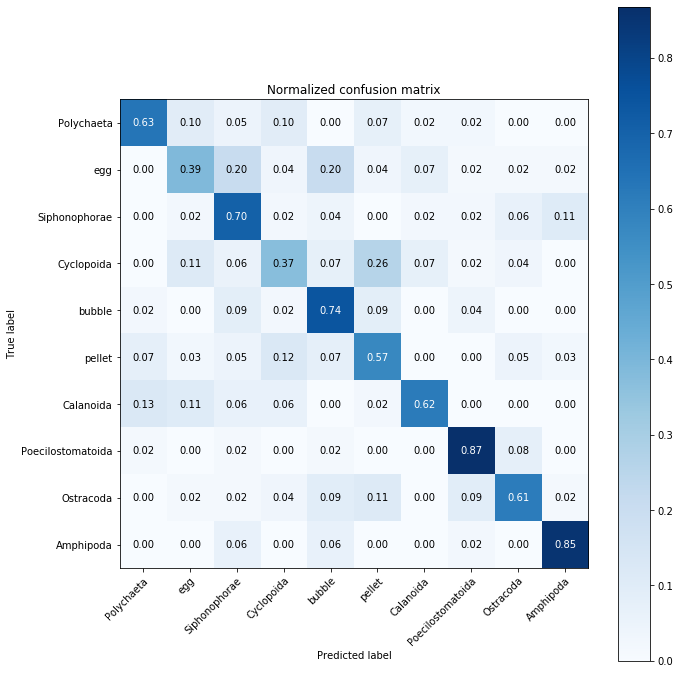

In [13]:
y_pred = knn.predict(X_test)
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

#### Grid search to find a good value for N

In [14]:
#%%time

best_score = 0
best_knn = None

for n in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
   
    score = knn.score(X_test, y_test)
  
    if score > best_score:
        best_score = score
        best_parameters = {'N': n}
        best_knn = knn

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.65
Best parameters: {'N': 5}


Normalized confusion matrix


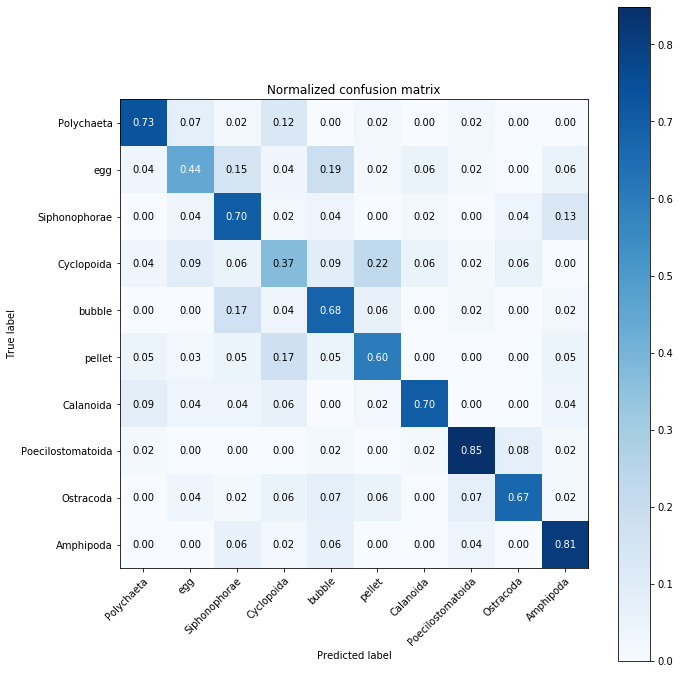

In [15]:
y_pred = best_knn.predict(X_test)
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

### Decision tree

In [16]:
#%%time

best_score = 0
best_tree = None

for n in range(1,30,3):
    tree = DecisionTreeClassifier(max_depth=n, random_state=0)
    tree.fit(X_train, y_train)
   
    score = tree.score(X_test, y_test)
  
    if score > best_score:
        best_score = score
        best_parameters = {'N': n}
        best_tree = tree

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.71
Best parameters: {'N': 10}


Normalized confusion matrix


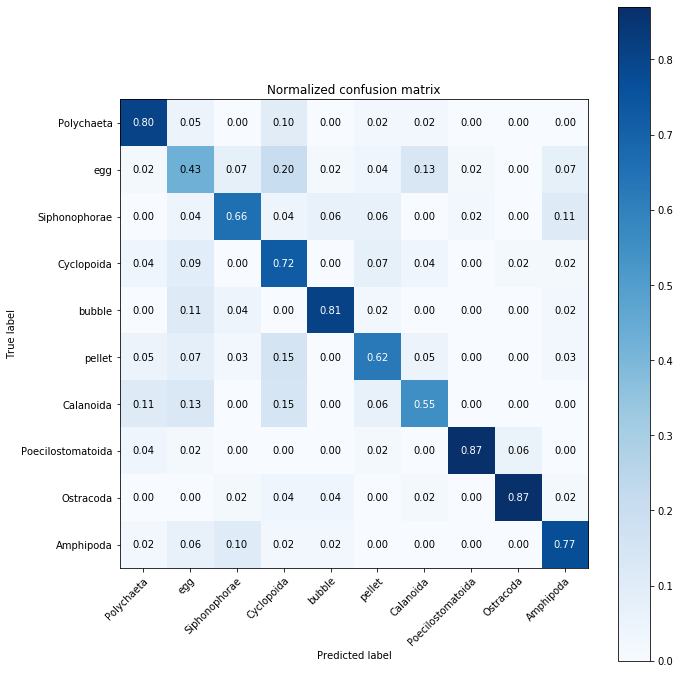

In [17]:
y_pred = best_tree.predict(X_test)
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

### Random Forest

In [18]:
#%%time

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.994
Accuracy on test set: 0.755


Normalized confusion matrix


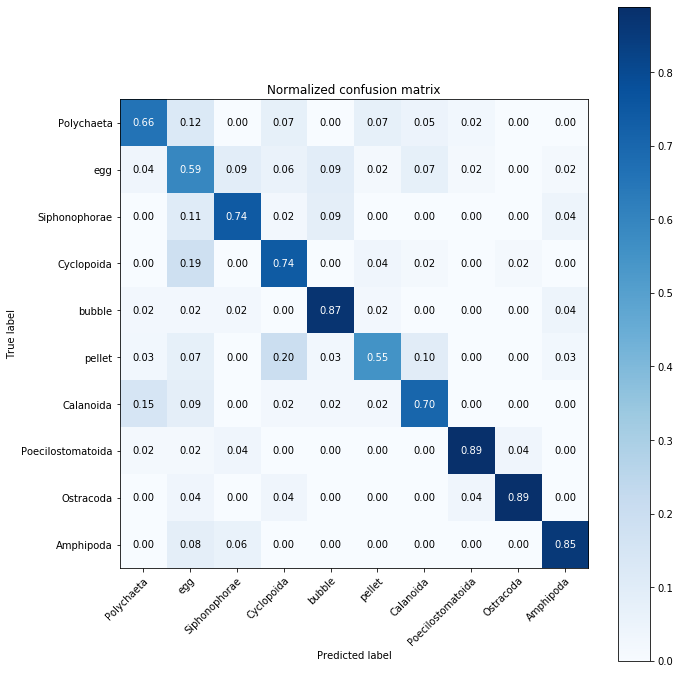

In [19]:
y_pred = rf.predict(X_test)
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

In [20]:
#%%time

best_score = 0
best_rf = None

for n in range(1,30,1):
    rf = RandomForestClassifier(max_depth=n, random_state=0)
    rf.fit(X_train, y_train)
   
    score = rf.score(X_test, y_test)
  
    if score > best_score:
        best_score = score
        best_parameters = {'N': n}
        best_rf = rf

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.77
Best parameters: {'N': 12}


Normalized confusion matrix


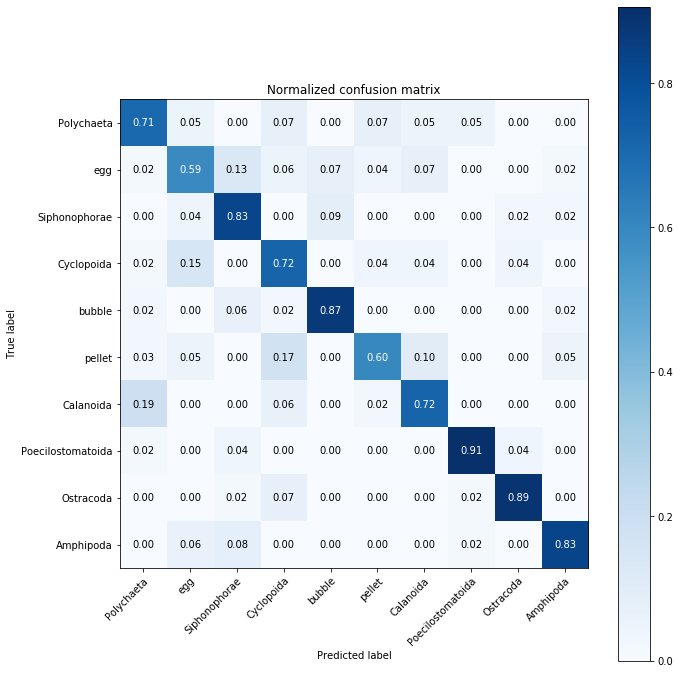

In [21]:
y_pred = best_rf.predict(X_test)
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

### Supported vector machine

TODO

### Multi layer perceptron

In [22]:
mlp = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2))

mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [23]:
mlp.score(X_test,y_test)

0.3670103092783505

Normalized confusion matrix


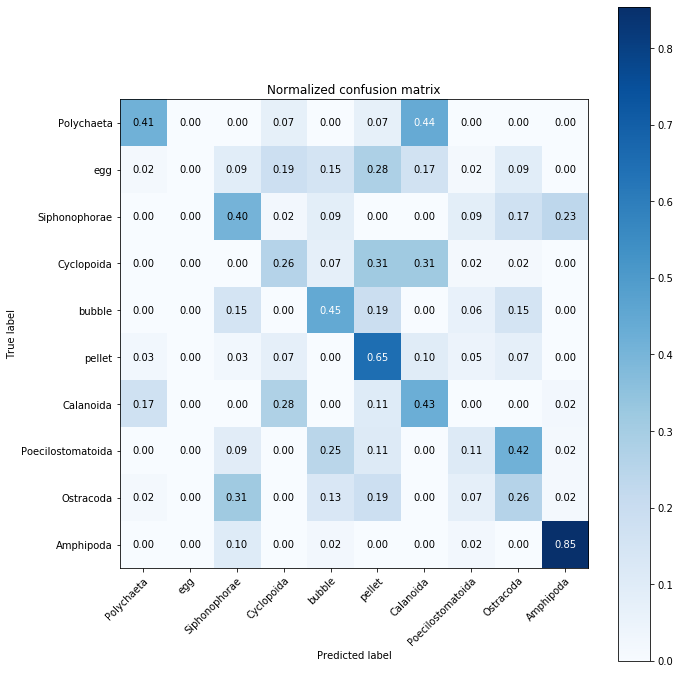

In [24]:
y_pred = mlp.predict(X_test)
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True,
                      title='Normalized confusion matrix')